# Methode des rectangles et des trapezes

On veut calculer l'integrale suivante: $$
\int_{0}^{10}10x^2.e^{-x} \, dx
$$ par des methodes d'integration numerique: la methode des rectangles et celle des trapezes:


### **1-Creation du fichier python**(Facile)

### **2-a)Calcul de l'integrale par les deux methodes**

**Section d'importation des modules** 

In [1]:
import numpy as np # importation des modules necessaires.
import matplotlib.pyplot as plt

**Definition de la fonction a integrer**

In [2]:
def f(x):
    """"Fonction a integrer """
    return 10*x**2*np.exp(-x)

**Definition de la primitive de la fonction**

In [3]:
def F(x):
    """primitive de f"""
    return -(10*x**2+20*x+20)*np.exp(-x)

**Definition de la fonction d'integration numerique par la methode des rectangles**

In [9]:
def rectangle(a, b, n):
    """Fonction nous permettant de faire l'integration numerique par la methode des rectangles"""
    h = (b-a)/(n-1)
    rect_plot_y = []
    rect_plot_x = []
    integrale = 0
    for j in range(n):
        x=a +j*h
        integrale = integrale + f(x)
        rect_plot_y.append([0,0,f(a+(j+1)*h),f(a+(j+1)*h),0])
        rect_plot_x.append([x,a+(j+1)*h,a+(j+1)*h,x,x])
    return h*integrale,rect_plot_x,rect_plot_y
    

**Definition de la fonction d'integration numerique par la methode des trapezes**

In [10]:
# defintion d'une fontion nous permettant de faire l'integration par la methode des trapezes et des rectangles
def trapeze(a, b, n):
    """Fonction nous permettant de faire l'integration numerique par la methode des trapezes"""
    h = b-a/(n-1)
    Trap_plot_y = []
    Trap_plot_x = []
    integrale = 0
    for j in range(n-1):
        x=a +j*h
        integrale = integrale + f(x)
        Trap_plot_y.append([0,0,f(a+(j+1)*h),f(x),0])
        Trap_plot_x.append([x,a+(j+1)*h,a+(j+1)*h,x,x])
    integrale = integrale + 0.5*f(b)-0.5*f(a)
    return h*integrale,Trap_plot_x,Trap_plot_y        

**Fonction pour effectuer la representation graphique** 

In [11]:
def Plotting(f,a,b,x_set,y_set,couleur,titre,methode):
    # creer la figure et l'axe
    fig,ax = plt.subplots()
    # creation des points qui vont nous servir a tracer la courbe
    x = np.linspace(a,b,100)
    y = f(x)
    # Tracee de la courbe de la fonction
    ax.plot(x,y,label = 'y = f(x)')
    # Tracee des rectangles
    ax.fill(x_set[0],y_set[0],color= couleur,alpha = 0.5,label = 'aire par la methode des '+methode)
    for i in range(1,len(x_set)):
        ax.fill(x_set[i],y_set[i],color= couleur,alpha = 0.5)
    
    # Annotation des axes du graphique
    ax.set_xlabel('x')
    ax.set_ylabel('y = f(x)')
    # Ajout de titre a chaque figure
    ax.set_title(titre)
    plt.legend()    
    #affichage de la courbe
    plt.show()
    

### Calcul integrale par  la methode des rectangles

In [12]:
int_rect,x,y = rectangle(0,10,15)
int_trap,u,v = trapeze(0,10,15)
print("l'integration numerique par la methode des rectangles donne: "+str(int_rect))
print("l'integration numerique par la methode des trapezes donne: "+str(int_trap))

l'integration numerique par la methode des rectangles donne: 19.938452647900213
l'integration numerique par la methode des trapezes donne: 19.922238387270752


### Calcul de l'ecart relatif entre le l'integrale numerique et de l'integrale reelle

In [13]:
int_analytic = F(10)-F(0)
Err_rect = abs(int_analytic-int_rect)/int_analytic
Err_trap = abs(int_analytic-int_trap)/int_analytic
print(f"L'ecart methodes des rectangles/analytic:{Err_rect:4.4f}")
print(f"L'ecart methodes des trapezes/analytic:{Err_trap:4.4f}")

L'ecart methodes des rectangles/analytic:0.0003
L'ecart methodes des trapezes/analytic:0.0011


### Representation graphique

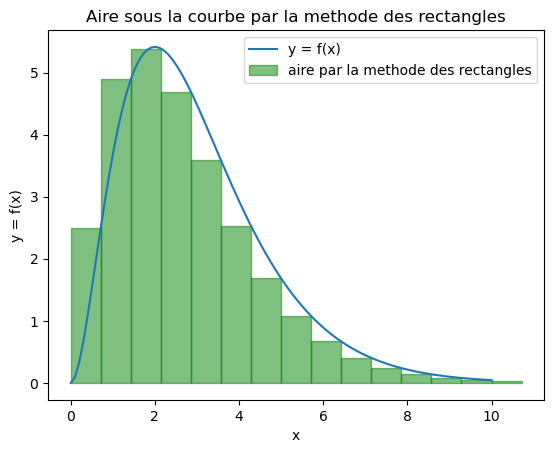

In [46]:
Plotting(f,0,10,x,y,'green','Aire sous la courbe par la methode des rectangles','rectangles')

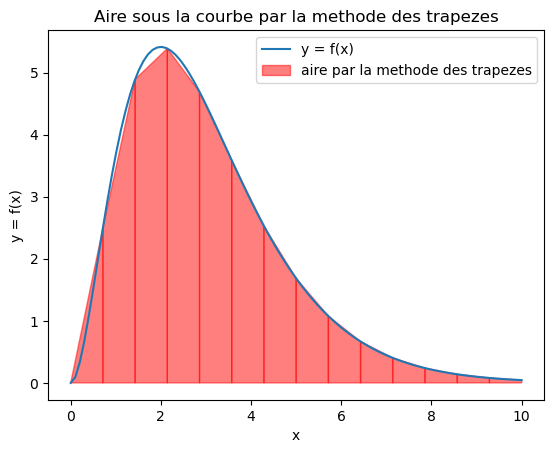

In [47]:
Plotting(f,0,10,u,v,'red','Aire sous la courbe par la methode des trapezes','trapezes')